### Sparse Additive Generative Model Analysis

Inspired from https://github.com/jacobeisenstein/SAGE/tree/master/py-sage and adapted to our data.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.dirname(os.path.dirname(os.path.abspath(os.path.join('.'))))
if module_path not in sys.path:
    print('Add root path to system path: ', module_path)
    sys.path.append(module_path)
module_path += '/'

Add root path to system path:  D:\Projects\CSS\cs6471-project


In [3]:
import sage
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [16]:
def getCountDictFromDataframe(df):
    """
    Build word count dictionaries from a pandas dataframe
    """
    res = {}
    for idx in range(len(df)):
        line = df.iloc[idx].text.lower()
        curr_line = line.split()
        for word in curr_line:
            if word not in res.keys():
                res[word] = 1
            else:
                res[word] += 1
    return res


In [17]:
off_df = pd.read_csv('./../../data/offenseval_train.csv')
print(off_df.shape)

(10592, 2)


In [18]:
off_df_0 = off_df.loc[off_df['label']==0].reset_index(drop=True)
off_df_1 = off_df.loc[off_df['label']==1].reset_index(drop=True)
print(off_df_0.shape)
print(off_df_1.shape)

(7107, 2)
(3485, 2)


In [19]:
%%time
off_counts_all = getCountDictFromDataframe(off_df)
off_counts_0 = getCountDictFromDataframe(off_df_0)
off_counts_1 = getCountDictFromDataframe(off_df_1)

Wall time: 2.09 s


In [20]:
vocab_length = 5000
vocab = [word for word, count in Counter(off_counts_1).most_common(vocab_length)]
print(len(vocab))

5000


In [21]:
x_child = np.array([off_counts_1[word] for word in vocab])
x_base = np.array([off_counts_all[word] for word in vocab]) + 1.

In [22]:
mu = np.log(x_base) - np.log(x_base.sum())

In [23]:
%%time
eta = sage.estimate(x_child,mu)

Wall time: 4.16 s


In [24]:
print(sage.topK(eta,vocab))

['bitch', 'fuck', 'idiot', 'shit', 'stupid', 'fucking', 'sucks', 'ass', 'shit.', 'disgusting']


In [25]:
print(sage.topK(-eta,vocab))

['brexit', ':red_heart:', 'join', 'labour', 'here.', ':face_blowing_a_kiss:', 'safe', ':thumbs_up:', ':smiling_face_with_smiling_eyes:', 'is!']


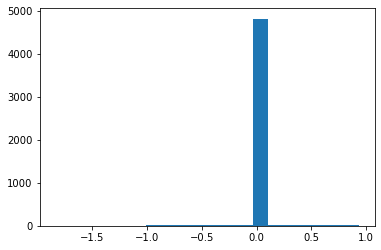

In [26]:
plt.hist(eta,20);

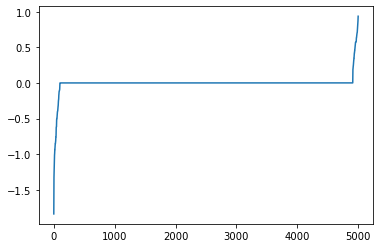

In [27]:
plt.plot(sorted(eta));